# Reproducible Data Science

## Tory W. Clasen
## Chief Data Scientist
### 18 JUL 19

# My Backstory


 - 20+ years of software development (Python < 0.9!)
 -  8+ years of cyber stuff
 -  4 years of data science
 
 
 ** Remind Tory to go on a tangent, time permitting

# What does it mean for research to be reproducible?

 - <B>Reproducibility:</B>

A study is reproducible if you can take the original data and the computer code used to analyze the data and reproduce all of the numerical findings from the study.

** <B>functional purity</B>

 - <B>Replicability:</B>

This is the act of repeating an entire study, independently of the original investigator without the use of original data (but generally using the same methods). 

# Reproducicble research has 4 components:

## Source Data

In [1]:
%%bash
head -n 4 malware_hash_list.txt

b439982f30b5b47fde89ff1384b671e0
de6fdc009fda2de3cf4dab4bfd4529c2
62028945d0ab974e183756ebbb1ca07f
f6febaf70042268a17efc985875131f5


In [2]:
%%bash
cat 1_download_samples.sh

#!/bin/bash

source config.env

if [ ! -d samples ]; then
    mkdir samples

    for sample in $( cat malware_hash_list.txt ); do
	echo "Downloading $sample"
        curl -s -o ./samples/$sample  "https://malshare.com/api.php?api_key=$MALSHARE_API_KEY&action=getfile&hash=$sample"
    done
fi


## Source Code

In [3]:
%%bash
cat 2_hash_samples.sh

#!/bin/bash

source config.env

if [ ! -d hashes ]; then
    mkdir hashes

    docker run --rm -it \
        -v "$PWD"/samples:/archive \
        -v "$PWD"/hashes:/hashes \
        -w /hashes \
        --name pharos \
        eschwartz/pharos:$PHAROS_DOCKER_TAG \
        /bin/bash -c "\
            for i in /archive/*; do \
                fn2hash \$i; \
            done > hashes.csv;\
            for i in /archive/*; do \
	        fn2yara \$i; \
	    done"
fi


## Configuration Information

In [21]:
%%bash
cat config.env | sed -e 's/MALSHARE_API_KEY=.*$/MALSHARE_API_KEY="<INSERT API KEY HERE>"/'

JUPYTER_PASSWORD=""
JUPYTER_DOCKER_TAG="6c3390a9292e"

MALSHARE_API_KEY="<INSERT API KEY HERE>"

PHAROS_DOCKER_TAG="latest"


** <B>Pets vs. Cattle</B>

## Intermediate Data and results

### Show your work!

# Reproducible Data Science with 10 easy rules, you won't believe #9!

## Rule 1: For Every Result, Keep Track of How It Was Produced

 - Again, show your work!
 - "OP Notes"
 - Jupyter Notebooks
 - "script" command

## Rule 2: Avoid Manual Data Manipulation Steps

 - Don't use excel

 - Instead use:
 
`zcat conn.gz.log | bro-cut id.orig_h id.orig_p id.resp_h id.resp_p orig_bytes | awk '{ a["\t", $1, "\t", $2, "\t", $3, "\t", $4] +=$5 } END { for ( i in a ) { print i, "\t", a[i] } }' | sort -rnk6 | head -n $size 2>/dev/null`

## Rule 3: Archive the Exact Versions of All External Programs Used

`docker run --rm -it \
        -v "$PWD"/samples:/archive \
        -v "$PWD"/hashes:/hashes \
        -w /hashes \
        --name pharos \
        eschwartz/pharos:$PHAROS_DOCKER_TAG`

But don't do this:

`PHAROS_DOCKER_TAG="latest"`

** <B>CI/CD Pipelines in Data Science</B>

## Rule 4: Version Control All Custom Scripts

In [5]:
%%bash
git log

commit 36e75683d565a7a0c2785c825f65acce104a1b69
Author: Tory Clasen <ToryClasen@gmail.com>
Date:   Thu Jul 18 20:42:17 2019 -0400

    Cleaned up formatting

commit e1ed103bf3bd093dd4608322d0c7610913a0e456
Author: Tory Clasen <ToryClasen@gmail.com>
Date:   Tue Jul 16 23:03:55 2019 -0400

    Unhid all slides required, added a summary slide.

commit d1dbcdb79af5bc7cf1fc79b34d7a616560bdc306
Author: Tory Clasen <ToryClasen@gmail.com>
Date:   Tue Jul 16 22:51:56 2019 -0400

    Renamed notebook to match repo

commit 164d104847e9bfd2e7cee625d2c9d38736cd7ab2
Author: Tory Clasen <ToryClasen@gmail.com>
Date:   Tue Jul 16 22:49:17 2019 -0400

    Unhide slide for collection

commit 2cdc24ca3dd98b5aae8fa859e804d12d41cc92b9
Merge: a2c2327 97355e5
Author: Tory Clasen <ToryClasen@gmail.com>
Date:   Tue Jul 16 22:46:20 2019 -0400

    Merge branch 'master' of github.com:tclasen/Reproducible-Data-Science

commit a2c2327597ce712baa01ff72173e172d02714aa8
Author: Tory Clasen <ToryClasen@gmail.com>
Date:

## Rule 5: Record All Intermediate Results, When Possible in Standardized Formats

In [6]:
%%bash
cat ./hashes/hashes.csv | head -n 2

00051B00402ACCB8A685FD77374DA817,0x00401000,2,2,53,147,51ADB788A659ACCFC01A55FD5BB296FB,51ADB788A659ACCFC01A55FD5BB296FB,5857DB86AA1F27EAED5A1A4FD65DC474,22FAAD875C868C0046084CFB6DC3846B,D40ADD2AF2612EAC4E7E67502D7D19BD,EBC72393A33D247D9C427660B00EE26A,D7ACE67CFAC1F836388E40C780749510,adc:1;add:28;call:1;cmp:1;cmpsb:1;cwde:1;dec:1;hlt:1;imul:1;in:1;lodsb:1;mov:4;or:1;push:4;sbb:1;sub:1;test:1;xchg:2;xlatb:1,BR:1;CMP:2;CRYPTO:0;FLT:0;I/O:1;LOGIC:1;MATH:33;SIMD:1;STR:2;SYS:0;UNCAT:0;VMM:0;XFER:12
00051B00402ACCB8A685FD77374DA817,0x00401093,1,1,42,93,88F2BEE97B748C0E5F5F9EE6A4291ACC,88F2BEE97B748C0E5F5F9EE6A4291ACC,D3FD500560A6FD3B31F81C8345D11A0B,E3A24B0C644A5957FBFAF8DAE0E34950,14CD661AA379D889E154407AC70D4822,2E9D3D8E4E55CCA23E50060555D17A6F,44B22C487D842AADAC6B54246E621367,adc:1;add:24;cdq:1;enter:1;inc:1;jmp:1;mov:2;or:1;out:1;pop:1;popad:1;popfd:1;push:2;pushad:1;stosd:1;test:1;xor:1,BR:1;CMP:1;CRYPTO:0;FLT:0;I/O:1;LOGIC:2;MATH:26;SIMD:0;STR:1;SYS:0;UNCAT:0;VMM:0;XFER:10


Include headers with your CSVs, or instead use JSON

## Rule 6: For Analyses That Include Randomness, Note Underlying Random Seeds


In [7]:
from random import randint
def rolldice(): return randint(1,20)

In [8]:
[ rolldice() for i in range(10) ]

[20, 10, 6, 17, 9, 17, 16, 10, 9, 11]

In [9]:
[ rolldice() for i in range(10) ]

[5, 14, 14, 13, 9, 12, 10, 6, 13, 2]

In [10]:
from random import seed

In [11]:
seed(42)
[ rolldice() for i in range(10) ]

[4, 1, 9, 8, 8, 5, 4, 18, 3, 19]

In [12]:
seed(42)
[ rolldice() for i in range(10) ]

[4, 1, 9, 8, 8, 5, 4, 18, 3, 19]

** <B>functional purity</B>

## Rule 7: Always Store Raw Data behind Plots

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
names = "filemd5,fn_addr,num_basic_blocks,num_basic_blocks_in_cfg,num_instructions,num_bytes,exact_hash,pic_hash,composite_pic_hash,mnemonic_hash,mnemonic_count_hash,mnemonic_category_hash,mnemonic_category_counts_hash,mnemonic_count_string,mnemonic_category_count_string,opt_basic_block_data,opt_bb_cfg".split(",")
df = pd.read_csv("./hashes/hashes.csv", names=names)

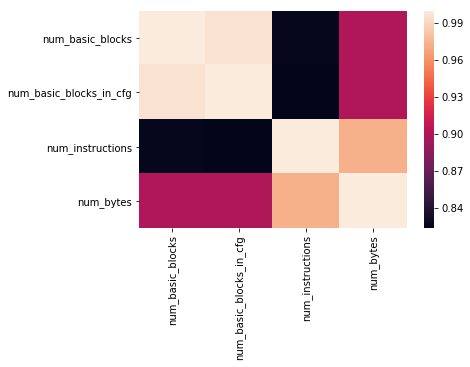

In [15]:
sns.heatmap(df[["num_basic_blocks", "num_basic_blocks_in_cfg", "num_instructions", "num_bytes"]].corr());

In [16]:
df[["num_basic_blocks", "num_basic_blocks_in_cfg", "num_instructions", "num_bytes"]].head()

,num_basic_blocks,num_basic_blocks_in_cfg,num_instructions,num_bytes
0,2,2,53,147
1,1,1,42,93
2,16,10,65,157
3,5,5,44,100
4,1,1,2,3


## Rule 8: Generate Hierarchical Analysis Output, Allowing Layers of Increasing Detail to Be Inspected

### Collect
 - Collection
 - Formatting
 - Cleaning
 - Normalizing
 - Feature Engineering
 
 ** <B>Data Engineer / Data Architect</B>

### Describe
 - Measures of central tendency
 - Measures of variability

### Discover
 - Anomaly / Outlier Detection
 - Trend Analysis
 - Dimensionality Reduction
 - Cluster Analysis

** <B>Data Exploration</B>

## Rule 9: Connect Textual Statements to Underlying Results

Why are you even doing this?

Start with an analytic research question

## Rule 10: Provide Public Access to Scripts, Runs, and Results

https://github.com/tclasen/Reproducible-Data-Science

# Summary
1. For Every Result, Keep Track of How It Was Produced
2. Avoid Manual Data Manipulation Steps
3. Archive the Exact Versions of All External Programs Used
4. Version Control All Custom Scripts
5. Record All Intermediate Results, When Possible in Standardized Formats
6. For Analyses That Include Randomness, Note Underlying Random Seeds
7. Always Store Raw Data behind Plots
8. Generate Hierarchical Analysis Output, Allowing Layers of Increasing Detail to Be Inspected
9. Connect Textual Statements to Underlying Results
10. Provide Public Access to Scripts, Runs, and Results

# Questions?

** <B>Show me the notebook!<B>


https://www.amstat.org/asa/files/pdfs/POL-ReproducibleResearchRecommendations.pdf

https://data-ken.org/how-to-build-reproducable-data-science-workflow.html

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003285#s9